<a href="https://colab.research.google.com/github/vidakpop/anomaly-detect/blob/main/Copy_of_anomalydetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-learn-intelex

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.8/131.8 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.3/75.3 MB 8.3 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
from sklearnex import sklearn_is_patched
sklearn_is_patched()
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import chardet

In [ ]:
url = 'https://raw.githubusercontent.com/vidakpop/anomaly-detect/main/late.csv'

# Download the file from the URL.
!wget {url} -O late.csv

# Open the file for reading.
with open('late.csv', 'r') as f:
    lines = f.readlines()


lines[5020] = ','.join(lines[5020].split(',')[:7]) + '\n'

# Open the file for writing.
with open('late.csv', 'w') as f:
    f.writelines(lines)

# Read the modified file into a DataFrame.
data = pd.read_csv('late.csv', encoding='latin')

--2024-03-17 14:25:09--  https://raw.githubusercontent.com/vidakpop/anomaly-detect/main/late.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20151250 (19M) [text/plain]
Saving to: ‘late.csv’

late.csv            100%[===================>]  19.22M  --.-KB/s    in 0.1s    

2024-03-17 14:25:09 (137 MB/s) - ‘late.csv’ saved [20151250/20151250]



In [ ]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117084 entries, 0 to 117083
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   No.          117084 non-null  int64  
 1   Time         117084 non-null  float64
 2   Source       117084 non-null  object 
 3   Destination  117084 non-null  object 
 4   Protocol     117084 non-null  object 
 5   Length       117084 non-null  int64  
 6   Info         117084 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 6.3+ MB
None


In [ ]:
print(data.head(5))

   No.          Time                                   Source  \
0    1  0.000000e+00                 2404:6800:4007:80a::200a   
1    2  2.240000e-07                 2404:6800:4007:80a::200a   
2    3  2.737900e-04  2409:40f4:100b:c1b6:b9fb:3ec3:5675:a236   
3    4  3.563550e-04  2409:40f4:100b:c1b6:b9fb:3ec3:5675:a236   
4    5  5.886481e-02                 2404:6800:4007:80a::200a   

                               Destination Protocol  Length  \
0  2409:40f4:100b:c1b6:b9fb:3ec3:5675:a236      UDP     195   
1  2409:40f4:100b:c1b6:b9fb:3ec3:5675:a236      UDP     112   
2                 2404:6800:4007:80a::200a      UDP     107   
3                 2404:6800:4007:80a::200a      UDP     102   
4  2409:40f4:100b:c1b6:b9fb:3ec3:5675:a236      UDP      87   

                    Info  
0  443  >  54762 Len=133  
1   443  >  54762 Len=50  
2   54762  >  443 Len=45  
3   54762  >  443 Len=40  
4   443  >  54762 Len=25  


In [ ]:
data.describe()

,No.,Time,Length
count,117084.000000,117084.000000,117084.000000
mean,58542.500000,2557.265139,675.000145
std,33799.383796,1998.481859,1062.354699
min,1.000000,0.000000,42.000000
25%,29271.750000,745.480519,86.000000
50%,58542.500000,2051.053935,101.000000
75%,87813.250000,3985.455522,1292.000000
max,117084.000000,6941.356968,17838.000000


from matplotlib import pyplot as plt
_df_0['No.'].plot(kind='hist', bins=20, title='No.')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Time'].plot(kind='hist', bins=20, title='Time')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Length'].plot(kind='hist', bins=20, title='Length')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='No.', y='Time', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Time', y='Length', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Time']
  ys = series['No.']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('Time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Time')
_ = plt.ylabel('No.')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Time']
  ys = series['Length']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('Time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Time')
_ = plt.ylabel('Length')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Time']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Time'}, axis=1)
              .sort_values('Time', ascending=True))
  xs = counted['Time']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('Time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Time')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_8['No.'].plot(kind='line', figsize=(8, 4), title='No.')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Time'].plot(kind='line', figsize=(8, 4), title='Time')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Length'].plot(kind='line', figsize=(8, 4), title='Length')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
frequency=data['Source'].value_counts()


<class 'pandas.core.series.Series'>
Index: 31 entries, 2409:40f4:100b:c1b6:b9fb:3ec3:5675:a236 to 2404:6800:4002:809::2002
Series name: Source
Non-Null Count  Dtype
--------------  -----
31 non-null     int64
dtypes: int64(1)
memory usage: 496.0+ bytes
None


Text(0, 0.5, 'frequency')

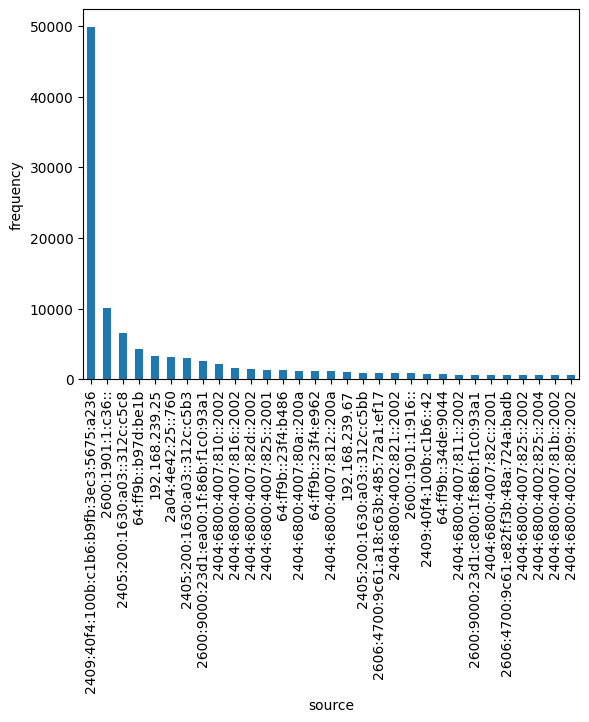

In [ ]:
import matplotlib.pyplot as plt
for i in frequency.index:
    if frequency[i]<500:
        frequency=frequency.drop(i)
print(frequency.info())
frequency.plot(kind='bar')
plt.xlabel('source')
plt.ylabel('frequency')

In [ ]:
destinationfrequency=data['Destination'].value_counts()
print(destinationfrequency.head(2))


2409:40f4:100b:c1b6:b9fb:3ec3:5675:a236    60423
2600:1901:1:c36::                           8550
Name: Destination, dtype: int64


Text(0, 0.5, 'Frequency')

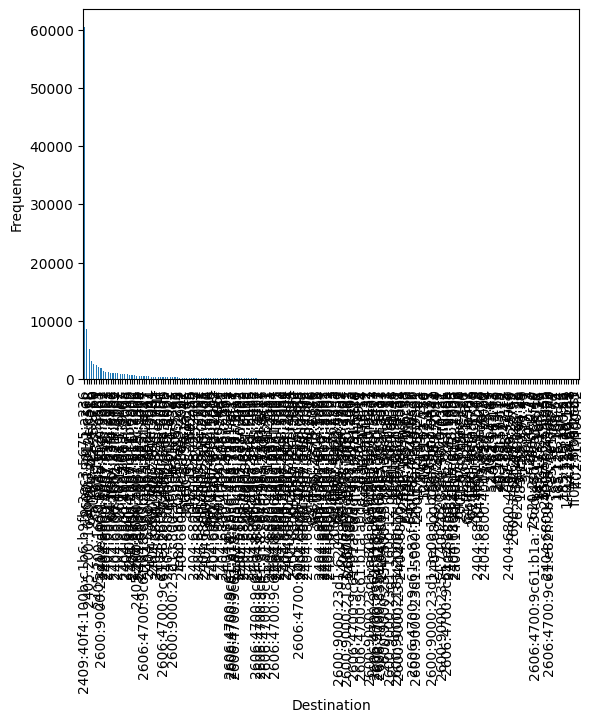

In [ ]:
for i in destinationfrequency.index:
    if destinationfrequency[i]<5000:
        destinaionfrequency=destinationfrequency.drop(i)
destinationfrequency.plot(kind='bar')
plt.xlabel('Destination')
plt.ylabel('Frequency')


Text(0, 0.5, 'frequency')

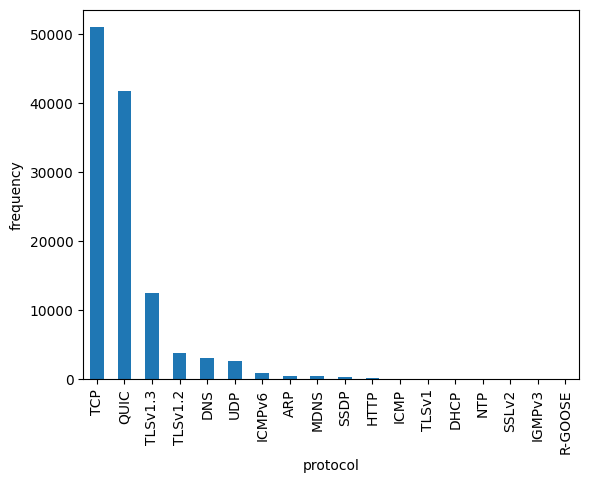

In [ ]:
protocoltraffic=data['Protocol'].value_counts()
protocoltraffic.plot(kind='bar')
plt.xlabel('protocol')
plt.ylabel('frequency')


In [ ]:

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import pandas as pd
import tensorflow as tf
TF_ENABLE_ONEDNN_OPTS=1

features = ['Protocol', 'Length']
X = data[features]
X_encoded = pd.get_dummies(X, columns=['Protocol'])
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_encoded)

input_dim = X_scaled.shape[1]
encoding_dim = 10

# Build and train the improved autoencoder model
autoencoder = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(input_dim,)),
    tf.keras.layers.Dropout(0.2),  # Add dropout for regularization
    tf.keras.layers.Dense(32, activation='relu'),  # Add another hidden layer
    tf.keras.layers.Dense(encoding_dim, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),  # Add a hidden layer for decoding
    tf.keras.layers.Dropout(0.2),  # Add dropout for regularization
    tf.keras.layers.Dense(64, activation='relu'),  # Add another hidden layer
    tf.keras.layers.Dense(input_dim, activation='sigmoid')
])

autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(X_scaled, X_scaled, epochs=20, batch_size=32)  # Increase the number of epochs

# Use the trained model for anomaly detection
reconstructed = autoencoder.predict(X_scaled)
mse = np.mean(np.power(X_scaled - reconstructed, 2), axis=1)
threshold = np.percentile(mse, 99.9)  # Adjust the percentile threshold based on your data

# Identify congestion points based on the anomaly scores
anomalypoints = data[mse > threshold]
print("Anomaly points:")
print(anomalypoints)







Epoch 1/20
3659/3659 [==============================] - 11s 3ms/step - loss: 0.0106
Epoch 2/20
3659/3659 [==============================] - 9s 3ms/step - loss: 0.0058
Epoch 3/20
3659/3659 [==============================] - 8s 2ms/step - loss: 0.0023
Epoch 4/20
3659/3659 [==============================] - 10s 3ms/step - loss: 0.0023
Epoch 5/20
3659/3659 [==============================] - 13s 3ms/step - loss: 0.0023
Epoch 6/20
3659/3659 [==============================] - 9s 2ms/step - loss: 0.0023
Epoch 7/20
3659/3659 [==============================] - 9s 2ms/step - loss: 0.0023
Epoch 8/20
3659/3659 [==============================] - 9s 3ms/step - loss: 0.0023
Epoch 9/20
3659/3659 [==============================] - 9s 3ms/step - loss: 0.0023
Epoch 10/20
3659/3659 [==============================] - 8s 2ms/step - loss: 0.0023
Epoch 11/20
3659/3659 [==============================] - 9s 2ms/step - loss: 0.0023
Epoch 12/20
3659/3659 [==============================] - 9s 2ms/step - loss: 0.002

In [ ]:

import numpy as np

reconstructed = autoencoder.predict(X_scaled)
mse = np.mean(np.power(X_scaled - reconstructed, 2), axis=1)
threshold = np.percentile(mse, 99.9)
anomalypoints = data[mse > threshold]
print("Anomaly points:")
print(anomalypoints)


3659/3659 [==============================] - 14s 4ms/step
Anomaly points:
           No.         Time                                   Source  \
11393    11394   378.940366  2409:40f4:100b:c1b6:b9fb:3ec3:5675:a236   
11649    11650   379.241750  2409:40f4:100b:c1b6:b9fb:3ec3:5675:a236   
11718    11719   379.337328                 2404:6800:4007:816::2002   
11900    11901   379.582071                 2404:6800:4007:816::2002   
25340    25341   733.891324                       64:ff9b::2841:b615   
...        ...          ...                                      ...   
100884  100885  5232.917712                 2404:6800:4007:810::2002   
100887  100888  5232.938124                 2404:6800:4007:810::2002   
100896  100897  5233.018562                 2404:6800:4007:810::2002   
100916  100917  5233.117866                 2404:6800:4007:812::200a   
115547  115548  6752.601175  2409:40f4:100b:c1b6:b9fb:3ec3:5675:a236   

                                    Destination Protocol  Len